In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Specifikuj cestu k souboru CSV
FILENAME = 'project_transcribe_results.csv'

# Načtení CSV souboru do DataFrame
data = pd.read_csv(FILENAME)
data['loss'] = data['loss'].astype('category')
data

,source_speaker,target_speaker,text_id,loss,ref_file,ref_content,gen_file,gen_content,score
0,p226,p225,0,all,../project_data/temp/p226/11.wav,to the scottish parliament's approval she's g...,../project_data/converted/p225/converted_a_all...,to the scottish parliament's approval she's g...,87.50000
1,p226,p225,0,asr,../project_data/temp/p226/11.wav,to the scottish parliament's approval she's g...,../project_data/converted/p225/converted_a_asr...,i'm sorry,0.00000
2,p226,p225,0,asr_cyc,../project_data/temp/p226/11.wav,to the scottish parliament's approval she's g...,../project_data/converted/p225/converted_a_asr...,to the scottish parliament's approval she's g...,87.50000
3,p226,p225,0,norm,../project_data/temp/p226/11.wav,to the scottish parliament's approval she's g...,../project_data/converted/p225/converted_a_nor...,to the scottish parliament's approval she's g...,87.50000
4,p226,p225,0,norm_cyc,../project_data/temp/p226/11.wav,to the scottish parliament's approval she's g...,../project_data/converted/p225/converted_a_nor...,to the scottish parliament's approval she's g...,87.50000
...,...,...,...,...,...,...,...,...,...
115,p225,p226,9,asr,../project_data/source/p225/44.wav,i came into,../project_data/converted/p226/converted_b_asr...,not so much,0.00000
116,p225,p226,9,asr_cyc,../project_data/source/p225/44.wav,i came into,../project_data/converted/p226/converted_b_asr...,i came in,66.66667
117,p225,p226,9,norm,../project_data/source/p225/44.wav,i came into,../project_data/converted/p226/converted_b_nor...,i came in,66.66667
118,p225,p226,9,norm_cyc,../project_data/source/p225/44.wav,i came into,../project_data/converted/p226/converted_b_nor...,i came in,66.66667


In [13]:
result_summary = data.groupby(['loss', 'target_speaker']).agg({'score': ['mean', 'std', 'max', lambda x: f"{(x == 100).sum()}/20"]})
result_summary.columns = ['mean_score', 'std_deviation', 'max_score', 'match_count']
result_summary = result_summary.sort_values(by='mean_score', ascending=False)

result_summary

,,mean_score,std_deviation,max_score,match_count
loss,target_speaker,,,,
all,p225,90.578282,7.155403,100.00000,3/20
adv,p225,89.063131,15.070126,100.00000,4/20
asr_cyc,p225,88.154040,15.219854,100.00000,4/20
norm_cyc,p225,88.154040,15.219854,100.00000,4/20
all,p226,86.745672,12.509667,100.00000,3/20
norm_cyc,p226,80.995672,18.551140,100.00000,3/20
adv,p226,78.340910,18.315115,100.00000,1/20
asr_cyc,p226,73.154762,16.801991,100.00000,1/20
norm,p225,71.181818,16.935361,87.50000,0/20


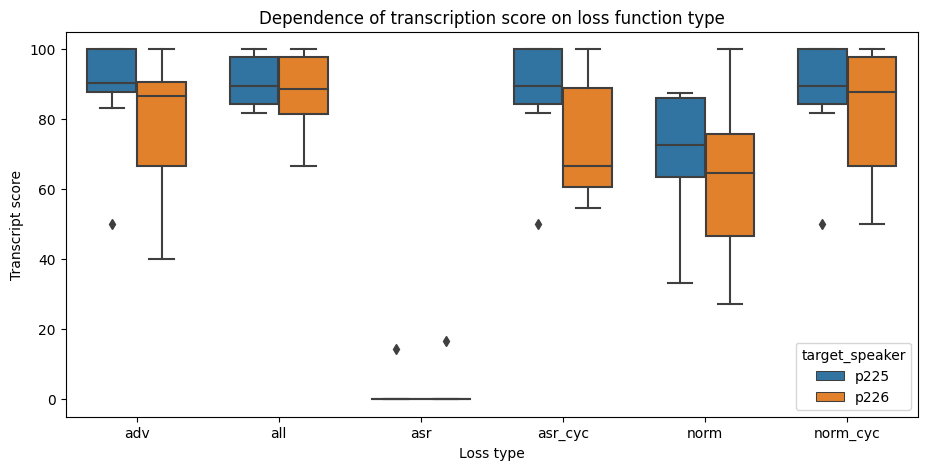

In [14]:
plt.figure(figsize=(11, 5))
sns.boxplot(x='loss', y='score', hue='target_speaker', data=data, width=0.7, dodge=True)

# Přidání popisků os a titulku
plt.xlabel('Loss type')
plt.ylabel('Transcript score')
plt.title('Dependence of transcription score on loss function type')

# Zobrazení grafu
plt.show()